In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
images,labels,X_train,y_train,X_test,y_test,X_val,y_val=viz_package.process_and_split_data()

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [67]:
import pandas as pd
from tensorflow import keras
import viz_package
from sklearn.metrics import confusion_matrix
from matplotlib.ticker import StrMethodFormatter
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import load_model as tf_load

In [10]:
base_model=tf_load('models/models/cnn_base')

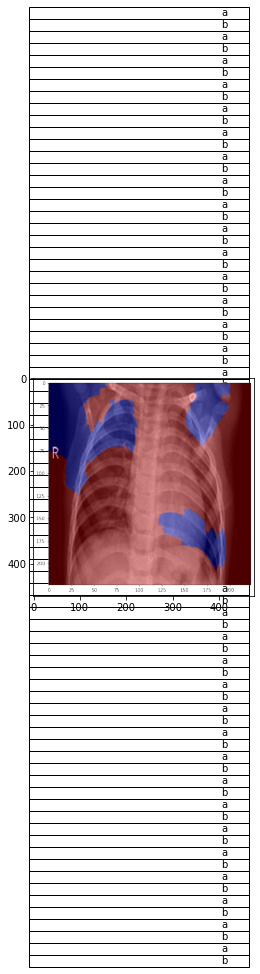

In [24]:
import matplotlib.image as mpimg
img=mpimg.imread('lime_pic.png')

plt.imshow(img)
plt.table(cellText=['a','b']*40,loc='center right')

In [25]:
dir(base_model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_trackable',
 '_add_unique_metric_name',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_attribute_sentinel',
 '_autocast',
 '_base_init',
 '_build_input_shape',
 '_build_model_with_inputs',
 '_cache_output_metric_attributes',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_check_call_args',
 '_check_trainable_weights_consistency',
 '_checkpoint_dependencies',
 '_clear_losse

In [105]:
base_model.layers

In [114]:
base_model.layers[0].get_config()

{'name': 'conv2d',
 'trainable': True,
 'batch_input_shape': [None, 224, 224, 1],
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': [3, 3],
 'strides': [1, 1],
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': [1, 1],
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [115]:
base_model.layers[1].get_config()

{'name': 'max_pooling2d',
 'trainable': True,
 'dtype': 'float32',
 'pool_size': [2, 2],
 'padding': 'valid',
 'strides': [2, 2],
 'data_format': 'channels_last'}

In [112]:
dir(base_model.layers[0])

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_attribute_sentinel',
 '_autocast',
 '_batch_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_collect_input_masks',
 '_compute_dtype',
 '_config',
 '_dedup_weights',
 '_deferred_dependencies',
 '_dtype',
 '_dtype_defaulted_to_floatx',
 '_dtype_policy',
 '_dynamic',
 '_eager_add_metric',
 '_eager_losses',
 '_expects

In [82]:
base_model.evaluate(X_test,y_test)

253/253 [==============================] - 5s 19ms/sample - loss: 0.0574 - acc: 0.9842 - recall: 0.9855


[0.05742537861564767, 0.98418975, 0.98550725]

In [91]:
viz_package.describe_model(base_model,X_test,y_test)

('Adam',
 3116769,
 {'loss': 0.05742537861564767, 'acc': 0.98418975, 'recall': 0.98550725})

In [78]:
base_model.count_params()

3116769

In [28]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 96800)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                3097632   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

In [ ]:
eval_dict={k:v for k,v in zip(model.metrics_names,model.evaluate(x,y,verbose=0))}

In [ ]:
base_model.

In [46]:
type(base_model.optimizer)

tensorflow.python.keras.optimizer_v2.adam.Adam

In [ ]:
fake_model=

In [37]:
base_model.metrics_names

['loss', 'acc', 'recall']

In [31]:
(base_model.get_config())['']

{'name': 'sequential',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': [None, 224, 224, 1],
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': [3, 3],
    'strides': [1, 1],
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': [1, 1],
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': [2, 2],
    'padding': 'valid',
    'strides': [2, 2],
    'data_format': 'channels_last'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_1',
    'trai

In [57]:
import tensorflow.keras
import tensorflow
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import models
from tensorflow.keras import layers

toss= models.Sequential()
toss.add(layers.Conv2D(64, (3, 3),
                      activation='relu'))


toss.add(layers.MaxPooling2D((2, 2)))
toss.add(layers.Conv2D(32, (3, 3), activation='relu'))
toss.add(layers.MaxPooling2D((2, 2)))
toss.add(layers.Flatten())
toss.add(layers.Dense(32, activation='relu'))
toss.add(layers.Dense(1, activation='sigmoid'))
toss.compile(loss='binary_crossentropy',
            optimizer="adamax",
            metrics=['acc',tensorflow.keras.metrics.Recall()])

In [62]:
str(toss.optimizer).split()[0].split('.')[-1]

'Adamax'

In [72]:
viz_package.describe_model(toss)

'Adamax'

In [80]:
dir(viz_package)

['ImageDataGenerator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'array_to_img',
 'binary_sorting_viz',
 'describe_model',
 'img_to_array',
 'keras',
 'load_img',
 'mlines',
 'np',
 'overlap_images',
 'plt',
 'pred_sorter',
 'process_and_split_data',
 'train_test_split']

In [117]:
# modlist=['cnn']+[f'cnn_0{n}' for n in range(1,9)]+['cnn_base']

# mod_dict={}
# for fn in modlist:
#     print(fn)
#     mod_dict[fn]=tf_load(f'models/models/{fn}')
    

cnn
cnn_01
cnn_02
cnn_03
cnn_04
cnn_05
cnn_06
cnn_07
cnn_08
cnn_base


In [119]:
mod_dict

{'cnn': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e3f147d348>,
 'cnn_01': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e3f17ec108>,
 'cnn_02': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e3f6b05248>,
 'cnn_03': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e3f6e77548>,
 'cnn_04': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e3f0167a08>,
 'cnn_05': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e3f048a1c8>,
 'cnn_06': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e3f085fbc8>,
 'cnn_07': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e3f0bf4e48>,
 'cnn_08': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e400cb3d88>,
 'cnn_base': <tensorflow.python.keras.saving.saved_model.load.Sequential at 0x1e400f85748>}

In [120]:
[mod_dict[m].loss for m in mod_dict]

['binary_crossentropy',
 'binary_crossentropy',
 'binary_crossentropy',
 'binary_crossentropy',
 'binary_crossentropy',
 'binary_crossentropy',
 'binary_crossentropy',
 'binary_crossentropy',
 'binary_crossentropy',
 'binary_crossentropy']

In [121]:
[mod_dict[m].optimizer for m in mod_dict]

In [126]:
base_model.save('test_save.h5')

In [128]:
mod_dict['cnn_04'].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 110, 110, 32)      18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 55, 55, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                3097632   
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

In [129]:
mod_dict['cnn_04'].save('cnn_04.h5')

In [131]:
model_best.summary()

NameError: name 'model_best' is not defined

In [134]:
pwd

'C:\\Users\\shawj\\fis\\mod_4_project'

In [139]:
best=tf_load(r'bobby_best/cnn')

In [140]:
best.layers

In [141]:
best.layers[2]

In [142]:
dir(best.layers[2])

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_inbound_node',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_attribute_sentinel',
 '_autocast',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_collect_input_masks',
 '_compute_dtype',
 '_config',
 '_dedup_weights',
 '_deferred_dependencies',
 '_dtype',
 '_dtype_defaulted_to_floatx',
 '_dtype_policy',
 '_dynamic',
 '_eager_add_metric',
 '_eager_losses',
 '_expects_mask_arg',
 '_expects_

In [143]:
best.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'batch_input_shape': [None, 224, 224, 1],
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': [3, 3],
    'strides': [1, 1],
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': [1, 1],
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': [2, 2],
    'padding': 'valid',
    'strides': [2, 2],
    'data_format': 'channels_last'}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trai

In [144]:
best.save('best.h5')